In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('jigsaw-toxic-comment-train.csv')
#df = pd.read_csv('combined_toxicity_data.csv')

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())


Первые 5 строк данных:
      id    target                                       comment_text  \
0  59848  0.000000  This is so cool. It's like, 'would you want yo...   
1  59849  0.000000  Thank you!! This would make my life a lot less...   
2  59852  0.000000  This is such an urgent design problem; kudos t...   
3  59855  0.000000  Is this something I'll be able to install on m...   
4  59856  0.893617               haha you guys are a bunch of losers.   

   severe_toxicity  obscene  identity_attack   insult  threat  asian  atheist  \
0         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
1         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
2         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
3         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
4         0.021277      0.0         0.021277  0.87234     0.0    0.0      0.0   

   ...  article_id    rating  funny  wow  sad  like

In [31]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...      0   
3  00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...      0   
4  0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Размерность данных (строки, столбцы):
(223147, 8)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223147 entries, 0 t

In [32]:
# Проверка на дубликаты по столбцу comment_text
duplicates_comment_text = df[df.duplicated('comment_text', keep=False)]
print(f"Найдено дубликатов по comment_text: {len(duplicates_comment_text)}")

# Удаление дубликатов по столбцу comment_text
df = df.drop_duplicates(subset='comment_text', keep='first')
print(f"Данные после удаления дубликатов по comment_text: {len(df)} строк")

Найдено дубликатов по comment_text: 421
Данные после удаления дубликатов по comment_text: 222917 строк


In [33]:
import re
import pandas as pd

# Словарь для замены символов
replacements = {
    "1": "и", "!": "и", "|": "и", "0": "о", "@": "а", "$": "с", "#": "х", "%": "п",
    "&": "и", "*": "", "(": "", ")": "", "-": "", "_": "", ".": "", ",": ""
}

# Функция для замены символов
def replace_special_chars(text):
    for char, replacement in replacements.items():
        text = text.replace(char, replacement)
    return text

# Функция для удаления лишних символов и смайликов
def remove_extra_chars(text):
    # Удаляем смайлики и лишние символы
    text = re.sub(r"[^\w\s]", "", text)  # Удаляем всё, кроме букв, цифр и пробелов
    text = re.sub(r"\s+", " ", text)  # Удаляем лишние пробелы
    return text.strip()

# Функция для нормализации текста
def normalize_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Заменяем спецсимволы
    text = replace_special_chars(text)
    # Удаляем лишние символы и смайлики
    text = remove_extra_chars(text)
    return text

# Основная функция для обработки текста
def preprocess_text(text):
    # Нормализация текста
    text = normalize_text(text)
    return text  # Возвращаем обработанный текст

# Применяем обработку текста и заменяем исходный столбец
df["comment_text"] = df["comment_text"].apply(preprocess_text)

# Вывод результата
print("Первые 5 строк данных после обработки:")
print(df.head())

# Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# Информация о данных
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных после обработки:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  dоои он соответствует этому цвету фона с котор...      0   
1  00025465d4725e87  поздравляю и меня хорошо использую инструменты...      0   
2  0009801bd85e5806  смысл mitsurugi не имеет смысла почему бы не п...      0   
3  00070ef96486d6f9  о и девушка выше начала свои споры со мной она...      0   
4  0007e25b2121310b  до свиданияи не смотри приходи или думай о воз...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Размерность данных (строки, столбцы):
(222917, 8)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 222917 e

In [34]:
import re

# Функция для удаления некорректных символов из текста
def remove_invalid_chars(text):
    # Регулярное выражение для поиска и удаления некорректных символов
    return re.sub(r'[^\x00-\x7Fа-яА-ЯёЁ]', '', text)

# Применяем функцию к столбцу comment_text
df['comment_text'] = df['comment_text'].apply(remove_invalid_chars)

# Проверяем результат
print("Первые 5 строк после очистки от некорректных символов:")
print(df.head())

Первые 5 строк после очистки от некорректных символов:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  dоои он соответствует этому цвету фона с котор...      0   
1  00025465d4725e87  поздравляю и меня хорошо использую инструменты...      0   
2  0009801bd85e5806  смысл mitsurugi не имеет смысла почему бы не п...      0   
3  00070ef96486d6f9  о и девушка выше начала свои споры со мной она...      0   
4  0007e25b2121310b  до свиданияи не смотри приходи или думай о воз...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [35]:
import re

# Функция для проверки, состоит ли текст только из спецсимволов или цифр
def is_special_or_numeric(text):
    # Регулярное выражение для поиска символов, не являющихся буквами
    return bool(re.match(r'^[\W\d_]+$', text))

# Находим комментарии, состоящие только из спецсимволов или цифр
special_or_numeric_comments = df[df['comment_text'].apply(is_special_or_numeric)]

# Выводим первые 5 строк для удаления
print("\nПервые 5 комментариев для удаления (только спецсимволы/цифры):")
print(special_or_numeric_comments.head())

# Удаляем такие комментарии
df = df[~df['comment_text'].apply(is_special_or_numeric)]
print(f"Данные после удаления комментариев с спецсимволами/цифрами: {len(df)} строк")


Первые 5 комментариев для удаления (только спецсимволы/цифры):
                      id                                       comment_text  \
159490  000d4f120d5a7303                                                      
159517  003044a2c35274b6                                                      
159706  00f496156c7ace6b                                                      
160032  021c0f6b3adb1944                                                ...   
160193  02ec95bbd8503d26                                                      

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
159490      0             0        0       0       0              0  
159517      0             0        0       0       0              0  
159706      0             0        0       0       0              0  
160032      0             0        0       0       0              0  
160193      0             0        0       0       0              0  
Данные после удаления комментариев с спец

In [36]:
def find_short_comments(df, column='comment_text', min_length=2):
    """
    Находит комментарии короче чем min_length символов.

    Параметры:
    df (pd.DataFrame): DataFrame с данными.
    column (str): Название столбца с текстом комментариев.
    min_length (int): Минимальная допустимая длина комментария.

    Возвращает:
    pd.DataFrame: DataFrame с комментариями короче min_length символов.
    """
    # Находим комментарии короче min_length символов
    short_comments = df[df[column].str.len() < min_length]
    
    return short_comments

short_comments = find_short_comments(df, column='comment_text', min_length=2)

# Вывод результата
print(f"Найдено комментариев короче 2 символов: {len(short_comments)}")
print(short_comments)

df = df[df['comment_text'].str.len() >= 2]
print(f"Данные после удаления коротких комментариев: {len(df)} строк")

Найдено комментариев короче 2 символов: 18
                      id comment_text  toxic  severe_toxic  obscene  threat  \
162502  0c59d39c021fc272            к      0             0        0       0   
163016  0e81ddea7fec8962                   0             0        1       0   
172794  35255b6638eec7b0                   0             0        0       0   
178322  4bd64ab2f0cbf78d                   0             0        0       0   
193600  897a72acfd648293                   0             0        0       0   
194827  8e714357fd51129f                   0             0        0       0   
198623  9d0b79f79c38e421                   0             0        1       0   
200250  a3c3d0edce2dfec4            и      0             0        0       0   
200282  a3ca1e0ac3738c4c                   0             0        0       0   
200535  a4e066b8551f8583                   0             0        0       0   
204329  b3e8da18654986a3                   0             0        0       0   
209700  c

In [37]:
import string
import pandas as pd
from natasha import MorphVocab, Doc, Segmenter, NewsMorphTagger, NewsEmbedding

# Загрузка стоп-слов для русского языка (используем NLTK)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация компонентов Natasha
segmenter = Segmenter()  # Для токенизации и сегментации текста
emb = NewsEmbedding()  # Загрузка модели для морфологического анализа
morph_tagger = NewsMorphTagger(emb)  # Для морфологического анализа
morph_vocab = MorphVocab()  # Для лемматизации

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление пунктуации
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Удаление стоп-слов
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Лемматизация с использованием Natasha
    doc = Doc(text)
    doc.segment(segmenter)  # Токенизация
    doc.tag_morph(morph_tagger)  # Морфологический анализ
    
    # Извлечение лемм
    for token in doc.tokens:
        token.lemmatize(morph_vocab)  # Лемматизация каждого токена
    lemmas = [token.lemma for token in doc.tokens]
    text = ' '.join(lemmas)
    
    return text

# Применение функции к столбцу с комментариями и замена исходного столбца
df['comment_text'] = df['comment_text'].apply(preprocess_text)

# Просмотр результата
print("Первые 5 строк данных после предобработки:")
print(df[['comment_text']].head())

# Удаление ненужных столбцов, если они есть
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, errors='ignore')

# 1. Просмотр первых нескольких строк данных
print("\nПервые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bokar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Первые 5 строк данных после предобработки:
                                        comment_text
0  d оои соответствовать этот цвет фон который по...
1  поздравлять использовать инструмент разговаривать
2  смысл mitsurugi иметь смысл почему поспорить в...
3  девушка выше начать свой спор я сунуть нос туд...
4  свиданияй смотри приходить думать возвращениии...

Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  d оои соответствовать этот цвет фон который по...      0   
1  00025465d4725e87  поздравлять использовать инструмент разговаривать      0   
2  0009801bd85e5806  смысл mitsurugi иметь смысл почему поспорить в...      0   
3  00070ef96486d6f9  девушка выше начать свой спор я сунуть нос туд...      0   
4  0007e25b2121310b  свиданияй смотри приходить думать возвращениии...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1           

In [38]:
# Проверка на дубликаты по столбцу comment_text
duplicates_comment_text = df[df.duplicated('comment_text', keep=False)]
print(f"Найдено дубликатов по comment_text: {len(duplicates_comment_text)}")

# Удаление дубликатов по столбцу comment_text
df = df.drop_duplicates(subset='comment_text', keep='first')
print(f"Данные после удаления дубликатов по comment_text: {len(df)} строк")

Найдено дубликатов по comment_text: 2325
Данные после удаления дубликатов по comment_text: 221154 строк
Данные после удаления дубликатов по comment_text: 221154 строк


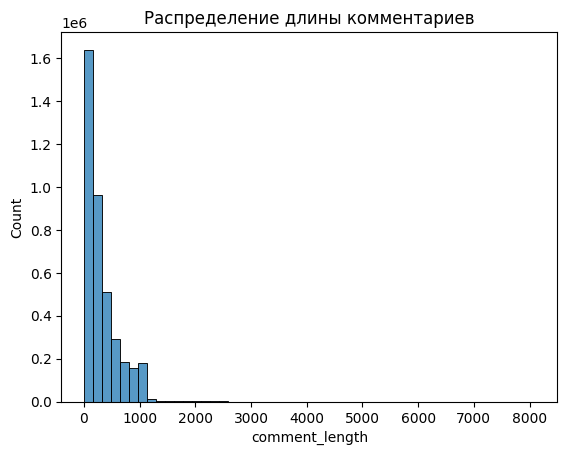

Обобщенные результаты анализа длины комментариев:
count    3.942562e+06
mean     3.107745e+02
std      3.079714e+02
min      1.000000e+00
25%      9.600000e+01
50%      2.070000e+02
75%      4.260000e+02
max      8.095000e+03
Name: comment_length, dtype: float64

Минимальная длина комментария: 1
Максимальная длина комментария: 8095
Средняя длина комментария: 310.77
Медианная длина комментария: 207.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Изучите длину комментариев
df['comment_length'] = df['comment_text'].apply(len)  # Добавляем столбец с длиной комментария

# Построение гистограммы
sns.histplot(df['comment_length'], bins=50)  # Строим гистограмму
plt.title('Распределение длины комментариев')  # Добавляем заголовок
plt.show()  # Отображаем график

# Печать обобщенных результатов в консоль
print("Обобщенные результаты анализа длины комментариев:")
print(df['comment_length'].describe())  # Основные статистические метрики
print(f"\nМинимальная длина комментария: {df['comment_length'].min()}")  # Минимальная длина
print(f"Максимальная длина комментария: {df['comment_length'].max()}")  # Максимальная длина
print(f"Средняя длина комментария: {df['comment_length'].mean():.2f}")  # Средняя длина
print(f"Медианная длина комментария: {df['comment_length'].median()}")  # Медиана

# Удаляем столбец comment_length после построения графика и анализа
df.drop(columns=['comment_length'], inplace=True)

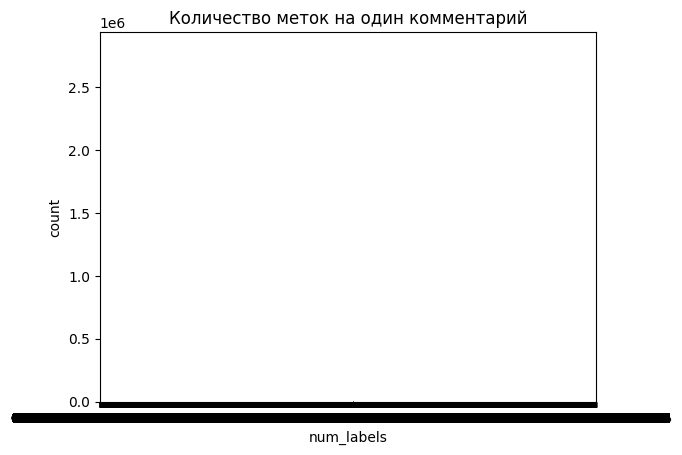

Распределение количества меток на один комментарий:
num_labels
0.000000    2796260
0.000923          2
0.001161          2
0.001203          2
0.001205          2
             ...   
4.516017          2
4.780191          2
5.000000        132
5.237695          2
6.000000          7
Name: count, Length: 30215, dtype: int64

Дополнительная информация:
Общее количество комментариев: 3942562
Комментарии без меток: 2796260 (70.92%)
Комментарии с хотя бы одной меткой: 1146302 (29.08%)


In [3]:
# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Добавляем столбец с количеством меток на один комментарий
df['num_labels'] = df[labels].sum(axis=1)

# Построение графика
sns.countplot(x='num_labels', data=df)
plt.title('Количество меток на один комментарий')
plt.show()

# Печать данных в консоль
print("Распределение количества меток на один комментарий:")
print(df['num_labels'].value_counts().sort_index())  # Сортировка по количеству меток

# Дополнительная информация
print("\nДополнительная информация:")
print(f"Общее количество комментариев: {len(df)}")
print(f"Комментарии без меток: {len(df[df['num_labels'] == 0])} ({(len(df[df['num_labels'] == 0]) / len(df)) * 100:.2f}%)")
print(f"Комментарии с хотя бы одной меткой: {len(df[df['num_labels'] > 0])} ({(len(df[df['num_labels'] > 0]) / len(df)) * 100:.2f}%)")

Распределение для любого типа токсичности (any_toxic):
any_toxic
0.000000    7.092495e-01
0.166667    6.918395e-02
0.200000    5.851068e-02
0.300000    2.967766e-02
0.400000    2.360445e-02
                ...     
0.197368    2.536422e-07
0.474576    2.536422e-07
0.746667    2.536422e-07
0.387097    2.536422e-07
0.001505    2.536422e-07
Name: proportion, Length: 18133, dtype: float64

Дополнительная информация:
Общее количество комментариев: 3942562
Количество нетоксичных комментариев: 2796260 (70.9%)
Количество токсичных комментариев: 42429 (1.1%)


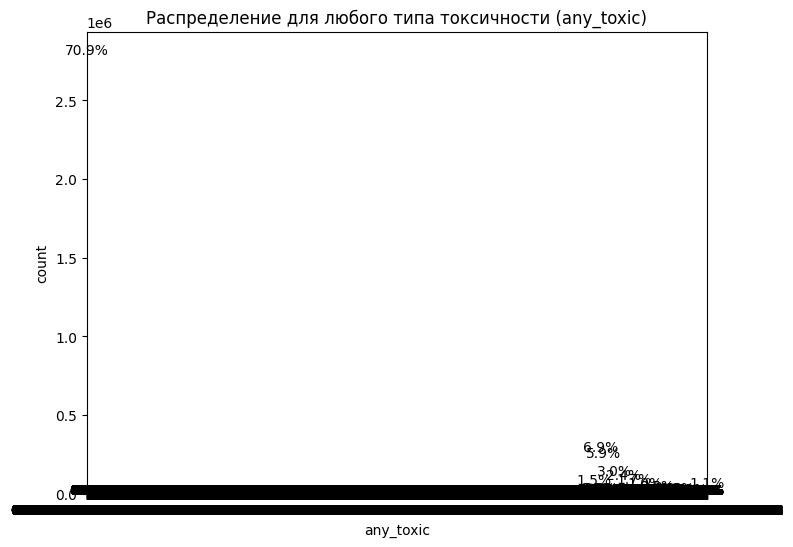

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем новый столбец, который указывает, является ли комментарий токсичным (хотя бы одна метка = 1)
df['any_toxic'] = df[labels].max(axis=1)

# Распределение для суммарного столбца
print("Распределение для любого типа токсичности (any_toxic):")
print(df['any_toxic'].value_counts(normalize=True))  # Процентное соотношение

# Дополнительная информация
print("\nДополнительная информация:")
print(f"Общее количество комментариев: {len(df)}")
print(f"Количество нетоксичных комментариев: {len(df[df['any_toxic'] == 0])} ({(len(df[df['any_toxic'] == 0]) / len(df)) * 100:.1f}%)")
print(f"Количество токсичных комментариев: {len(df[df['any_toxic'] == 1])} ({(len(df[df['any_toxic'] == 1]) / len(df)) * 100:.1f}%)")

# Визуализация с процентами на столбиках
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='any_toxic', data=df)
plt.title('Распределение для любого типа токсичности (any_toxic)')

# Добавление процентных значений на столбики
for p in ax.patches:
    height = p.get_height()  # Высота столбика
    percentage = (height / len(df)) * 100  # Процентное соотношение
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Позиция по X (центр столбика)
        height + 0.1,                    # Позиция по Y (немного выше столбика)
        f'{percentage:.1f}%',            # Текст с процентом
        ha='center'                      # Выравнивание по центру
    )

plt.show()

Дополнительная информация по токсичным комментариям:
Количество токсичных комментариев: 21199 (9.6%)
Топ-10 самых частых слов в токсичных комментариях:
[('это', 14260), ('который', 5898), ('и', 5823), ('ваш', 4481), ('дерьмо', 4479), ('сосать', 4255), ('мочь', 4066), ('мой', 3914), ('человек', 3903), ('википедия', 3585)]

Дополнительная информация по нетоксичным комментариям:
Количество нетоксичных комментариев: 199955 (90.4%)
Топ-10 самых частых слов в нетоксичных комментариях:
[('это', 189422), ('который', 102349), ('статья', 92187), ('и', 74084), ('страница', 71073), ('мочь', 62278), ('2', 54599), ('ваш', 50403), ('википедия', 45789), ('должный', 44083)]


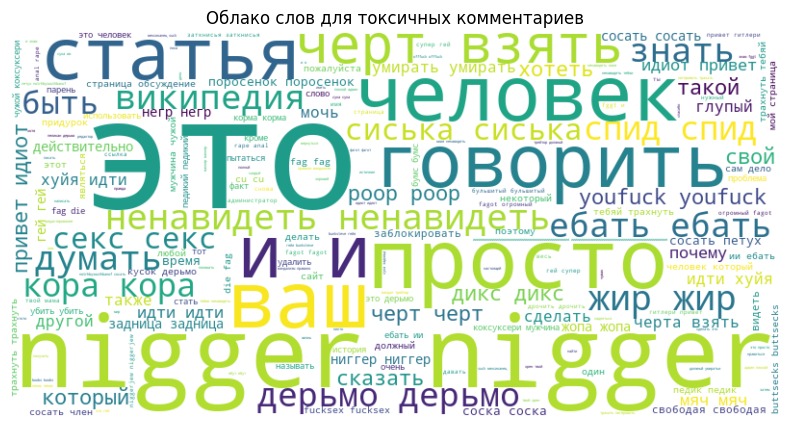

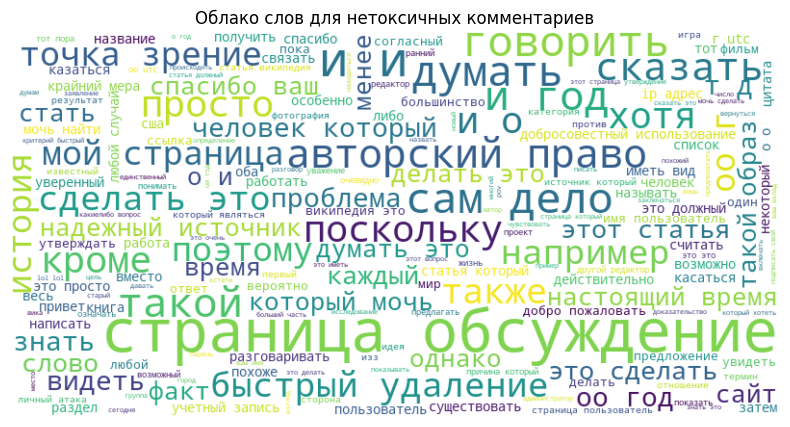

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Функция для построения облака слов
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Тексты для токсичных и нетоксичных комментариев
toxic_text = ' '.join(df[df['toxic'] == 1]['comment_text'])
non_toxic_text = ' '.join(df[df['toxic'] == 0]['comment_text'])

# Дополнительная информация
print("Дополнительная информация по токсичным комментариям:")
print(f"Количество токсичных комментариев: {len(df[df['toxic'] == 1])} ({(len(df[df['toxic'] == 1]) / len(df)) * 100:.1f}%)")
print("Топ-10 самых частых слов в токсичных комментариях:")
toxic_words = toxic_text.split()
toxic_word_counts = Counter(toxic_words)
print(toxic_word_counts.most_common(10))

print("\nДополнительная информация по нетоксичным комментариям:")
print(f"Количество нетоксичных комментариев: {len(df[df['toxic'] == 0])} ({(len(df[df['toxic'] == 0]) / len(df)) * 100:.1f}%)")
print("Топ-10 самых частых слов в нетоксичных комментариях:")
non_toxic_words = non_toxic_text.split()
non_toxic_word_counts = Counter(non_toxic_words)
print(non_toxic_word_counts.most_common(10))

# Облако слов для токсичных комментариев
generate_wordcloud(toxic_text, 'Облако слов для токсичных комментариев')

# Облако слов для нетоксичных комментариев
generate_wordcloud(non_toxic_text, 'Облако слов для нетоксичных комментариев')

C:\Users\bokar\AppData\Local\Temp\ipykernel_6348\2432535805.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


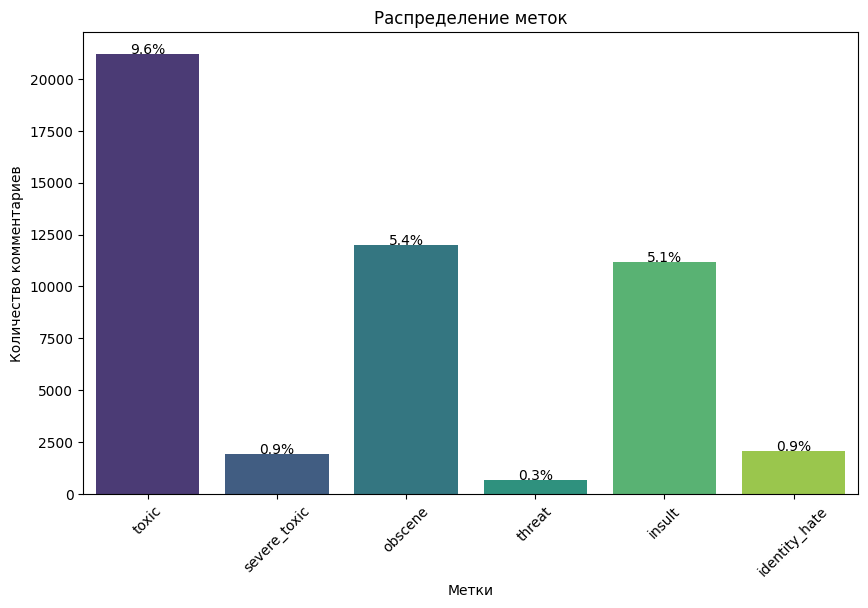

Результаты анализа меток:
           Метка  Количество  Процент (%)
0          toxic       21199     9.585628
1   severe_toxic        1940     0.877217
2        obscene       11999     5.425631
3         threat         678     0.306574
4         insult       11170     5.050779
5  identity_hate        2091     0.945495


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Подсчет количества комментариев для каждой метки
label_counts = df[labels].sum()

# Расчет процентного соотношения для каждой метки
label_percentages = df[labels].mean() * 100

# Создание DataFrame для вывода
result_df = pd.DataFrame({
    'Метка': label_counts.index,
    'Количество': label_counts.values,
    'Процент (%)': label_percentages.values
})

# Визуализация в виде bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Распределение меток')
plt.ylabel('Количество комментариев')
plt.xlabel('Метки')
plt.xticks(rotation=45)

# Добавление процентного соотношения наверху каждого столбца
for p in ax.patches:
    height = p.get_height()  # Высота столбца
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Позиция по X (центр столбца)
        height + 0.1,                    # Позиция по Y (немного выше столбца)
        f'{height / len(df) * 100:.1f}%',  # Текст с процентом
        ha='center'                      # Выравнивание по центру
    )

plt.show()

# Вывод результата в консоль
print("Результаты анализа меток:")
print(result_df)

In [44]:
%pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
from sqlalchemy import create_engine, inspect

# Подключение к базе данных
engine = create_engine("sqlite:///cleaned_comments.db")

# Вывод содержимого таблицы
def print_table_contents(engine, table_name):
    # Загрузка данных из таблицы в DataFrame
    df = pd.read_sql_table(table_name, engine)
    
    # Вывод первых 5 строк
    print(f"Первые 5 строк таблицы '{table_name}':")
    print(df.head())
    
    # Вывод количества записей
    print(f"\nКоличество записей в таблице '{table_name}': {len(df)}")
    
    # Вывод структуры таблицы (столбцы и их типы)
    inspector = inspect(engine)
    columns = inspector.get_columns(table_name)
    print("\nСтруктура таблицы:")
    for column in columns:
        print(f"Столбец: {column['name']}, Тип: {column['type']}")

# Запись DataFrame в базу данных
table_name = "cleaned_comments"
df.to_sql(table_name, engine, if_exists="replace", index=False)
print(f"\nДанные успешно записаны в таблицу '{table_name}'.")


# Проверка наличия таблицы
inspector = inspect(engine)
tables = inspector.get_table_names()
print(f"Таблицы в базе данных: {tables}")

if "cleaned_comments" in tables:
    # Вывод содержимого таблицы
    def print_table_contents(engine, table_name):
        # Загрузка данных из таблицы в DataFrame
        df = pd.read_sql_table(table_name, engine)
        
        # Вывод первых 5 строк
        print(f"Первые 5 строк таблицы '{table_name}':")
        print(df.head())
        
        # Вывод количества записей
        print(f"\nКоличество записей в таблице '{table_name}': {len(df)}")
        
        # Вывод структуры таблицы (столбцы и их типы)
        columns = inspector.get_columns(table_name)
        print("\nСтруктура таблицы:")
        for column in columns:
            print(f"Столбец: {column['name']}, Тип: {column['type']}")

    # Вывод содержимого таблицы и дополнительной информации
    print_table_contents(engine, "cleaned_comments")
else:
    print("Таблица 'cleaned_comments' не найдена в базе данных.")


Данные успешно записаны в таблицу 'cleaned_comments'.
Таблицы в базе данных: ['cleaned_comments']
Первые 5 строк таблицы 'cleaned_comments':
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  d оои соответствовать этот цвет фон который по...      0   
1  00025465d4725e87  поздравлять использовать инструмент разговаривать      0   
2  0009801bd85e5806  смысл mitsurugi иметь смысл почему поспорить в...      0   
3  00070ef96486d6f9  девушка выше начать свой спор я сунуть нос туд...      0   
4  0007e25b2121310b  свиданияй смотри приходить думать возвращениии...      1   

   severe_toxic  obscene  threat  insult  identity_hate  num_labels  any_toxic  
0             0        0       0       0              0           0          0  
1             0        0       0       0              0           0          0  
2             0        0       0       0              0           0          0  
3             0        0       0       0       